In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
incomes = pd.read_excel("table1.xlsx")

In [10]:
incomes.head()

,operation_id,user_id,volume,currency,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38


In [11]:
incomes.shape

(26021, 5)

In [12]:
currencies = pd.read_excel("table2.xlsx")

In [13]:
currencies

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,4217-10-01 00:00:00,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,3815-10-01 00:00:00,2023-02-07
5,EUR,RUB,76.0347,2023-02-07
6,GEL,RUB,26.7006,2023-02-07
7,USD,RUB,70.5991,2023-02-07
8,CNY,RUB,4331-10-01 00:00:00,2023-02-08
9,EUR,RUB,75.9087,2023-02-08


In [7]:
currencies.shape

(28, 4)

# 1) Выведите максимальный размер пополнения в долларах за неделю, начинающуюся с 8 февраля

In [14]:
incomes.head()

,operation_id,user_id,volume,currency,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38


In [16]:
incomes['operation_date'] = pd.to_datetime(incomes['operation_date'])

In [17]:
incomes['operation_day'] = incomes['operation_date'].dt.floor('d')

In [18]:
incomes.head()

,operation_id,user_id,volume,currency,operation_date,operation_day
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09


array([[<Axes: title={'center': 'operation_day'}>]], dtype=object)

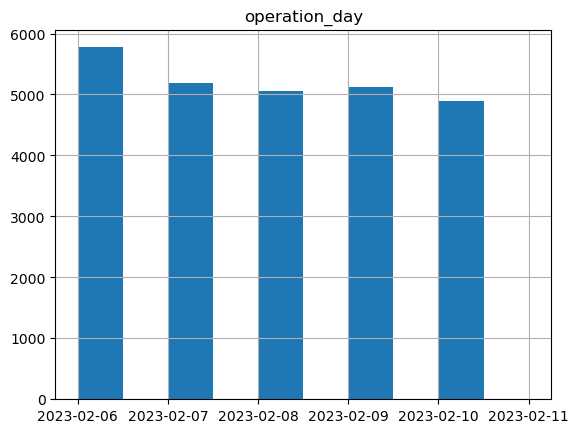

In [19]:
incomes.hist('operation_day')

In [34]:
# ответ на 1 задачу
incomes.loc[
    (incomes['operation_day'] >= pd.Timestamp("2023-02-08"))
    & (incomes['currency'] == "USD" ),'volume']
.max()

1800000.0

# 2) Выведите средний размер пополнений за февраль подневно, в разбивке по валютам.
# Результатом должна быть таблица формата "дата, валюта и размер пополнения" (с округлением до целого числа).

In [25]:
incomes.head()

,operation_id,user_id,volume,currency,operation_date,operation_day
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09


In [30]:
incomes.groupby(['operation_day', 'currency'])['volume'].mean().reset_index()

,operation_day,currency,volume
0,2023-02-06,CNY,3.146146e+04
1,2023-02-06,EUR,8.610809e+03
2,2023-02-06,RUR,1.654025e+06
3,2023-02-06,USD,3.749798e+03
4,2023-02-07,CNY,2.457217e+04
5,2023-02-07,EUR,5.059852e+03
6,2023-02-07,RUR,1.567446e+06
7,2023-02-07,USD,5.901608e+03
8,2023-02-08,CNY,8.200014e+04
9,2023-02-08,EUR,3.909435e+03


In [32]:
incomes.groupby(['operation_day', 'currency'])['volume'].count().reset_index()

,operation_day,currency,volume
0,2023-02-06,CNY,12
1,2023-02-06,EUR,492
2,2023-02-06,RUR,3413
3,2023-02-06,USD,1857
4,2023-02-07,CNY,13
5,2023-02-07,EUR,418
6,2023-02-07,RUR,3116
7,2023-02-07,USD,1636
8,2023-02-08,CNY,17
9,2023-02-08,EUR,419


In [31]:
incomes.groupby(['operation_day', 'currency']).agg({"volume": lambda x: len(x)}).reset_index()

,operation_day,currency,volume
0,2023-02-06,CNY,12
1,2023-02-06,EUR,492
2,2023-02-06,RUR,3413
3,2023-02-06,USD,1857
4,2023-02-07,CNY,13
5,2023-02-07,EUR,418
6,2023-02-07,RUR,3116
7,2023-02-07,USD,1636
8,2023-02-08,CNY,17
9,2023-02-08,EUR,419


# 3) Посчитайте долю клиентов, у которых были пополнения в нескольких валютах. Ответ округлите до десятых процента.

### Получить всех клиентов, у которых пополнения > 1 валюте

In [41]:
users_currencies_count = incomes.groupby('user_id')['currency'].nunique().reset_index()

In [43]:
users_currencies_count.sort_values("currency", ascending=False)

,user_id,currency
1535,714980,2
2587,1665190,2
21207,61271886,2
13096,29714175,2
7284,14939638,2
...,...,...
8039,15093314,1
8038,15093198,1
8037,15092910,1
8036,15092738,1


In [45]:
sum(users_currencies_count['currency'] > 1)

73

In [46]:
73 / incomes.shape[0]

0.0028054263863802314

### Посчитаем всех клиентов, которые пополняли

In [48]:
incomes['user_id'].nunique()

24092

In [49]:
incomes['user_id'].value_counts()

30072158    9
30453646    8
30438206    7
30254104    7
30087306    7
           ..
31143341    1
34638573    1
39926417    1
30449109    1
5499669     1
Name: user_id, Length: 24092, dtype: int64

In [50]:
users_currencies_count.shape[0]

24092

In [54]:
# ответ на 3 задачу
round(sum(users_currencies_count['currency'] > 1) / users_currencies_count.shape[0] * 100, 1)

0.3

# 4) По каждому клиенту вывести дату первого пополнения, валюту, сумму в рублях (используйте вторую таблицу). Ответом выведите общую сумму в рублях по всем клиентам.

### 1. Найти для каждого клиент запись с самым первым пополнением

#### 1 подход

In [57]:
users_first_income = incomes.groupby("user_id")['operation_date'].min().reset_index()

In [59]:
users_first_income.head()

,user_id,operation_date
0,1403,2023-02-07 17:46:13
1,3311,2023-02-08 11:44:09
2,3594,2023-02-09 12:30:52
3,3816,2023-02-06 21:32:23
4,3893,2023-02-07 12:00:34


In [81]:
users_first_income_df = pd.merge(incomes, users_first_income, "inner", ['user_id', 'operation_date'])

In [82]:
users_first_income_df.head()

,operation_id,user_id,volume,currency,operation_date,operation_day
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09


#### 2 подход

In [91]:
# TODO: window func

### 2. Джоин таблиц с пополнениями и с курсами валют


In [92]:
currencies

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,10.4217,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,10.3815,2023-02-07
5,EUR,RUB,76.0347,2023-02-07
6,GEL,RUB,26.7006,2023-02-07
7,USD,RUB,70.5991,2023-02-07
8,CNY,RUB,10.4331,2023-02-08
9,EUR,RUB,75.9087,2023-02-08


In [76]:
currencies.loc[currencies['rate_currency'] == "CNY", 'rate_value']\
    = currencies.loc[currencies['rate_currency'] == "CNY", 'rate_value'].apply(lambda x: str(x)[5:7] + '.' + str(x)[:4])

In [79]:
currencies['rate_value'] = currencies['rate_value'].astype(float)

In [84]:
first_incomes_with_rate_values = pd.merge(
    users_first_income_df, 
    currencies, 
    how='left', 
    left_on=['currency', 'operation_day'], 
    right_on=['rate_currency', 'rate_date']
)

### 3. Вывести общую сумму в рублях

In [87]:
first_incomes_with_rate_values['rate_value'] = first_incomes_with_rate_values['rate_value'].fillna(1.0)

In [90]:
# ответ на 4 задачу
sum(first_incomes_with_rate_values['volume'] * first_incomes_with_rate_values['rate_value'])

26114821150.351273

# 5) Посчитайте по каждому клиенту среднюю разницу в днях между его пополнениями, выведите медианное значение по всем клиентам.

In [94]:
incomes_sorted = incomes.sort_values("operation_date")

In [98]:
incomes_sorted["prev"] = incomes_sorted.groupby("user_id")['operation_date'].shift(1)

In [109]:
incomes_with_prev = incomes_sorted.loc[~incomes_sorted['prev'].isnull()]

In [110]:
incomes_with_prev.head()

,operation_id,user_id,volume,currency,operation_date,operation_day,prev
25139,880790,2834060,90.0,USD,2023-02-06 03:40:52,2023-02-06,2023-02-06 03:04:20
14342,874863,29943896,2331.0,RUR,2023-02-06 03:40:54,2023-02-06,2023-02-06 03:23:20
9423,3486706,29873689,400.0,USD,2023-02-06 08:52:43,2023-02-06,2023-02-06 02:03:22
17325,4688156,10205096,1000.0,USD,2023-02-06 09:34:50,2023-02-06,2023-02-06 09:33:03
12718,1750778,4950262,35100.0,RUR,2023-02-06 10:10:46,2023-02-06,2023-02-06 03:21:09


In [113]:
incomes_with_prev['delta'] = incomes_with_prev['operation_date'] - incomes_with_prev['prev']

/var/folders/cg/z1gdqpsx1qq3lyb5lp3896zh0000gq/T/ipykernel_58145/2255752560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomes_with_prev['delta'] = incomes_with_prev['operation_date'] - incomes_with_prev['prev']


In [118]:
incomes_with_prev_delta = incomes_with_prev.groupby("user_id")['delta'].mean().reset_index()

In [121]:
incomes_with_prev_delta['delta_days'] = incomes_with_prev_delta['delta'].dt.days

In [122]:
incomes_with_prev_delta

,user_id,delta,delta_days
0,13027,2 days 00:01:46,2
1,38439,1 days 15:54:56,1
2,46330,2 days 03:16:49,2
3,50918,3 days 00:21:47,3
4,84281,0 days 04:39:09,0
...,...,...,...
1634,122665840,3 days 21:30:40,3
1635,122749808,2 days 19:35:37,2
1636,122998292,0 days 00:54:18,0
1637,123024856,1 days 04:24:55,1


In [123]:
# ответ на 5 задачу
incomes_with_prev_delta['delta_days'].median()

1.0